In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lego-sets-and-price-1955-2023/Output.csv


In [2]:
df = pd.read_csv("/kaggle/input/lego-sets-and-price-1955-2023/Output.csv", sep=';')
df.head()

/tmp/ipykernel_20/2695727865.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/lego-sets-and-price-1955-2023/Output.csv", sep=';')


,year,Theme name,Sets Name,Sets URL,Part category,Part name,Part material,Part color,RGB,Is Transparent?,Part URL,Set Price,Number of reviews,Star rating
0,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Dark Blue,0A3463,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
1,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Trans-Dark Blue,0020A0,True,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
2,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Dark Blue,0A3463,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
3,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Bright Green,4B9F4A,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
4,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Bright Light Blue,9FC3E9,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"


In [3]:
df.drop(columns=['Sets URL', 'Part URL'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698983 entries, 0 to 4698982
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   year               int64 
 1   Theme name         object
 2   Sets Name          object
 3   Part category      object
 4   Part name          object
 5   Part material      object
 6   Part color         object
 7   RGB                object
 8   Is Transparent?    object
 9   Set Price          object
 10  Number of reviews  object
 11  Star rating        object
dtypes: int64(1), object(11)
memory usage: 430.2+ MB


In [5]:
df.isna().sum()

year                    0
Theme name              0
Sets Name               0
Part category           1
Part name               1
Part material           1
Part color           1239
RGB                  1239
Is Transparent?      1239
Set Price               0
Number of reviews       0
Star rating             0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df['Star rating'] = df['Star rating'].apply(lambda x: x.replace(',', '.'))

In [8]:
numeric_features = ['Set Price', 'Number of reviews', 'Star rating', 'year']

for feature in numeric_features: 
    df[feature] = pd.to_numeric(df[feature].apply(lambda x: x.replace(",","") if type(x) not in (int, float) else x))

In [9]:
# encoding 
from sklearn.preprocessing import LabelEncoder 

encoders = {}
text_features = [feature for feature in df.columns if feature not in numeric_features]
# print(text_features)

for feature in text_features: 
    encoders[feature] = LabelEncoder()
    df[feature] = encoders[feature].fit_transform(df[feature])

In [10]:
df.head()

,year,Theme name,Sets Name,Part category,Part name,Part material,Part color,RGB,Is Transparent?,Set Price,Number of reviews,Star rating
0,2016,73,248,28,2396,5,17,7,0,533556,23,4.7
1,2016,73,248,28,2396,5,117,0,1,533556,23,4.7
2,2016,73,248,28,2396,5,17,7,0,533556,23,4.7
3,2016,73,248,28,2396,5,3,18,0,533556,23,4.7
4,2016,73,248,28,2396,5,4,54,0,533556,23,4.7


<Axes: >

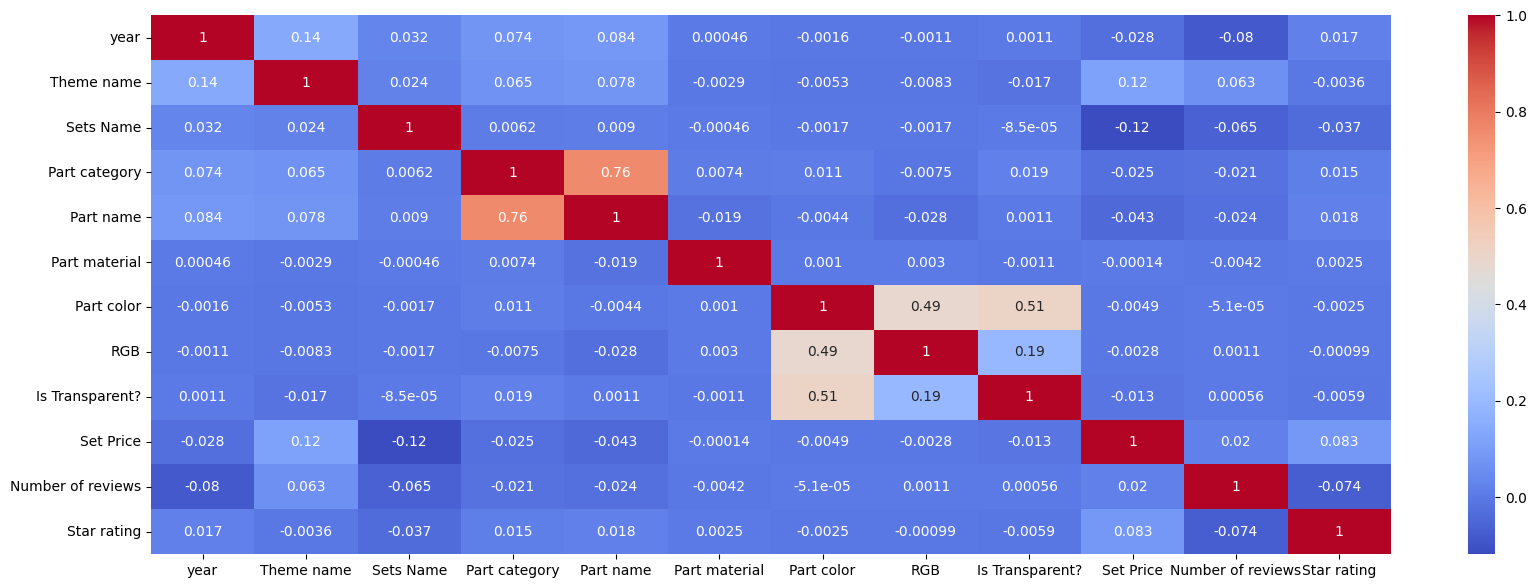

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [12]:
# feature seletion
corr = df.corr()
corr = corr["Star rating"]
threshold = 0.005

low_corr_features = corr[abs(corr) < threshold].index
print(f"Removing these features: {low_corr_features}")
df_filtered = df.drop(low_corr_features, axis=1)

Removing these features: Index(['Theme name', 'Part material', 'Part color', 'RGB'], dtype='object')


In [13]:
df_filtered.head()

,year,Sets Name,Part category,Part name,Is Transparent?,Set Price,Number of reviews,Star rating
0,2016,248,28,2396,0,533556,23,4.7
1,2016,248,28,2396,1,533556,23,4.7
2,2016,248,28,2396,0,533556,23,4.7
3,2016,248,28,2396,0,533556,23,4.7
4,2016,248,28,2396,0,533556,23,4.7


In [14]:
df_filtered.duplicated().sum()

4619399

In [15]:
df_filtered.drop_duplicates(inplace=True)

In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78345 entries, 0 to 4698660
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               78345 non-null  int64  
 1   Sets Name          78345 non-null  int64  
 2   Part category      78345 non-null  int64  
 3   Part name          78345 non-null  int64  
 4   Is Transparent?    78345 non-null  int64  
 5   Set Price          78345 non-null  int64  
 6   Number of reviews  78345 non-null  int64  
 7   Star rating        78345 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [17]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered.drop('Star rating', axis=1), df_filtered['Star rating'])

In [18]:
# !pip install --upgrade dask-cudf
# !pip install --upgrade pandas

In [19]:
# train 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# from cuml.ensembe import RamdomForestRegressor

pipe1 = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_jobs = -1))
])

pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(n_jobs=-1))])

In [20]:
# test
from sklearn.metrics import mean_absolute_error
y_pred = pipe1.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print(f"MeanAbsoluteError with RandomForestRegressor is {mae}")

MeanAbsoluteError with RandomForestRegressor is 0.0001965498069937865


In [21]:
# so, the Mean abslute erorr is 10 power -5, hence the model is doing well 
# please ping if any wrong in the analysis, I'm a learner. 
# also add any good questions, if you have any. 
# thanks

In [22]:
# import cudf
# from cuml.ensemble import RandomForestRegressor
# from cuml.preprocessing import LabelEncoder
# from cuml.model_selection import train_test_split
# from cuml.metrics import mean_squared_error

# # Assuming 'df' is your preprocessed DataFrame
# # Drop unnecessary columns (if any) for training
# X = df.drop(['Star rating'], axis=1)

# # Convert categorical variables to numerical representations using LabelEncoder
# label_encoder = LabelEncoder()
# X_encoded = X.apply(label_encoder.fit_transform)

# # Extract the target variable
# y = df['Star rating']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Train the RandomForestRegressor on GPU
# rf_regressor = RandomForestRegressor()
# rf_regressor.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_regressor.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
